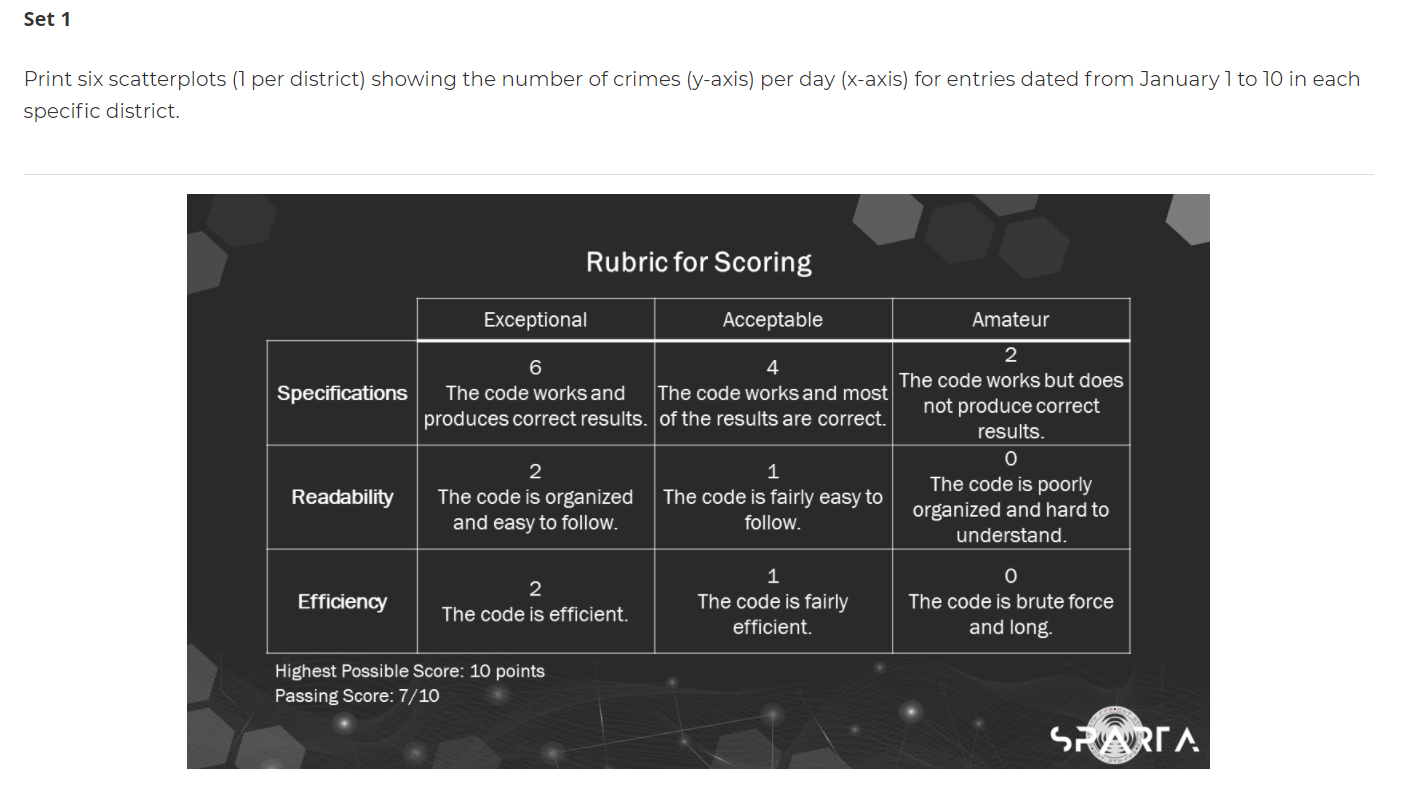

In [65]:
#1.Import dataset

import pandas as pd

#read sales.csv file, in checking this file kindly redirect your file location.
data= pd.read_csv(r"crime.csv")
data.head(5)

cdatetime                      address  district        beat  grid  \
0  01/11/2006 22:00  BRUCEVILLE RD / CENTER PKWY         5              1654   
1   1/31/2006 18:09  CENTER PKWY / BRUCEVILLE RD         5              1654   
2  01/10/2006 23:35             6440 FIELDALE DR         5  5C          1661   
3  01/10/2006 23:35             6440 FIELDALE DR         5  5C          1661   
4   1/17/2006 16:58            6560 KENBRIDGE ST         5  5C          1661   

                      crimedescr  ucr_ncic_code   latitude   longitude  
0  484 PETTY THEFT/LICENSE PLATE           2399  38.437999 -121.417761  
1  20001(A) VC HIT/RUN INJ/DEATH           5401  38.437999 -121.417761  
2           TOWED/STORED VEHICLE           7000  38.438098 -121.429272  
3           TOWED/STORED VEHICLE           7000  38.438098 -121.429272  
4     10851 VC AUTO THEFT LOCATE           2404  38.438116 -121.426723

In [66]:
#2.Describe the dataset, inspect no. of rows, max, and min numbers of each column

data.describe(include="all")

cdatetime           address     district        beat  \
count              7584              7584  7584.000000        7584   
unique             5094              5492          NaN          20   
top     01/01/2006 0:01  3555 AUBURN BLVD          NaN  2B           
freq                 24                47          NaN         521   
mean                NaN               NaN     3.574631         NaN   
std                 NaN               NaN     1.642512         NaN   
min                 NaN               NaN     1.000000         NaN   
25%                 NaN               NaN     2.000000         NaN   
50%                 NaN               NaN     3.000000         NaN   
75%                 NaN               NaN     5.000000         NaN   
max                 NaN               NaN     6.000000         NaN   

               grid                     crimedescr  ucr_ncic_code  \
count   7584.000000                           7584    7584.000000   
unique          NaN                            304            NaN   
top             NaN  10851(A)VC TAKE VEH W/O OWNER            NaN   
freq            NaN                            653            NaN   
mean     916.250791                            NaN    4275.068829   
std      407.436310                            NaN    2171.593193   
min      102.000000                            NaN     909.000000   
25%      567.000000                            NaN    2309.000000   
50%      899.000000                            NaN    3532.000000   
75%     1264.000000                            NaN    7000.000000   
max     1661.000000                            NaN    8102.000000   

           latitude    longitude  
count   7584.000000  7584.000000  
unique          NaN          NaN  
top             NaN          NaN  
freq            NaN          NaN  
mean      38.559809  -121.463832  
std        0.056101     0.034621  
min       38.437999  -121.555832  
25%       38.518476  -121.489543  
50%       38.559523  -121.465459  
75%       38.610361  -121.435947  
max       38.683789  -121.365238

In [3]:
#3. Inspect the data types per column

data.dtypes

cdatetime         object
address           object
district           int64
beat              object
grid               int64
crimedescr        object
ucr_ncic_code      int64
latitude         float64
longitude        float64
dtype: object

In [67]:
#4. Import libraries and convert date & time datatype from "object" to "datetime64" format

import pandas as pd
import numpy as np

data["cdatetime"]=pd.to_datetime(data.cdatetime)
data.dtypes

cdatetime        datetime64[ns]
address                  object
district                  int64
beat                     object
grid                      int64
crimedescr               object
ucr_ncic_code             int64
latitude                float64
longitude               float64
dtype: object

In [68]:
#5. Inspect all months present in the dataframe

data_Month= data['cdatetime'].dt.month_name() 
data_Month.describe(include="all")


count        7584
unique          1
top       January
freq         7584
Name: cdatetime, dtype: object

In [69]:
#6. Inspect total no. of district in the dataframe

data_District= data['district']
data_District.describe(include="all")

count    7584.000000
mean        3.574631
std         1.642512
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max         6.000000
Name: district, dtype: float64

In [70]:
#7. Inspect day number in the dataframe

data_District= data['district']
data_District.describe(include="all")
data_Day= data['cdatetime'].dt.day
data_Day

0       11
1       31
2       10
3       10
4       17
        ..
7579    14
7580    15
7581     8
7582    26
7583     7
Name: cdatetime, Length: 7584, dtype: int64

In [72]:
#8. Filter dataframe with the columns needed as described in the problem. (Day, Crime rate, District)

from collections import Counter

data_needed = pd.DataFrame(data,columns=['Day', "District"])
data['Day'] = data_Day  
data['District'] = data_District
data_needed

Day  District
0      11         5
1      31         5
2      10         5
3      10         5
4      17         5
...   ...       ...
7579   14         1
7580   15         1
7581    8         1
7582   26         1
7583    7         1

[7584 rows x 2 columns]

In [74]:
#9. Filter the dataframe with days 1-10 only for the month of January

data_cleaned = (data_needed[(data_needed.Day >0) & (data.Day <=10)]) 
data_cleaned = data_cleaned.sort_values("Day",ascending=True )
data_cleaned

Day  District
6186    1         1
928     1         5
5357    1         3
4223    1         3
1944    1         4
...   ...       ...
6372   10         2
6368   10         2
2188   10         4
1929   10         6
2      10         5

[2338 rows x 2 columns]

In [75]:
#10. Count the number of crimes per district per day

data_cleaned1= data_cleaned.groupby(data_cleaned.columns.tolist()).size().reset_index().\
    rename(columns={0:'Count'})
data_cleaned1.head(10)

Day  District  Count
0    1         1     40
1    1         2     58
2    1         3     52
3    1         4     26
4    1         5     35
5    1         6     39
6    2         1     21
7    2         2     37
8    2         3     33
9    2         4     16

In [12]:
#11. Inspect the datatype of the recent dataframe

data_cleaned1.dtypes

Day         int64
District    int64
Count       int64
dtype: object

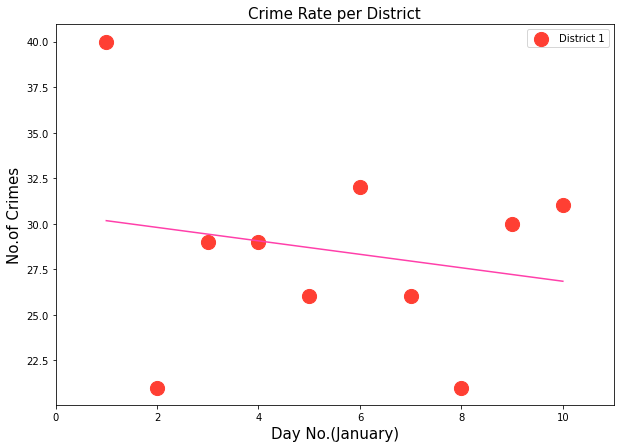

In [76]:
#12. Use a scatter plot to visualize the crime rate of District 1 for days 1-10 in the month of January 

import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.linear_model import LinearRegression

fig, ax = plot.subplots(figsize=(10,7))

ax.set_ylabel('No.of Crimes', fontsize=15)
ax.set_xlabel('Day No.(January)', fontsize=15)
plot.title('Crime Rate per District', fontsize = 15)
District1=(data_cleaned1[(data_cleaned1.District ==1)]) 

plot.xlim(0,11)
plot.scatter(District1.Day, District1.Count, s = 200, c = '#FF3F33', label = 'District 1',)
plot.legend(loc='upper right')

z1 = np.polyfit(District1.Day, District1.Count, 1)
p1 = np.poly1d(z1)
plot.plot(District1.Day,p1(District1.Day),"#FF3FAA")

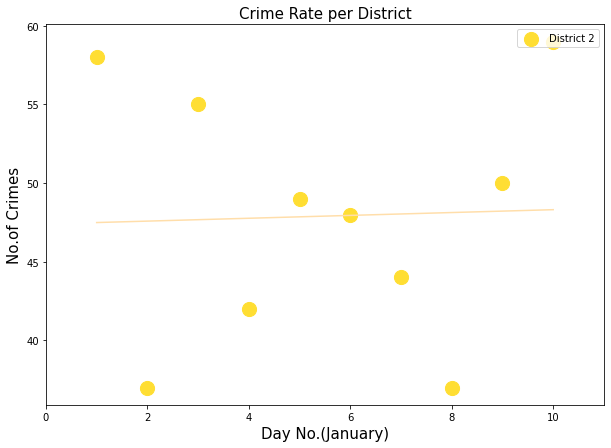

In [77]:
#13. Use a scatter plot to visualize the crime rate of District 2 for days 1-10 in the month of January 

import matplotlib.pyplot as plot
import seaborn as sns

X = data_cleaned1.iloc[:, [0,1]].values
Y = data_cleaned1['Count']
Y1 = np.array(Y)
fig, ax = plot.subplots(figsize=(10,7))
ax.set_ylabel('No.of Crimes', fontsize=15)
ax.set_xlabel('Day No.(January)', fontsize=15)
plot.title('Crime Rate per District', fontsize = 15)
District2=(data_cleaned1[(data_cleaned1.District ==2)]) 

plot.xlim(0,11)
plot.scatter(District2.Day, District2.Count, s = 200, c = '#FFDE33', label = 'District 2')
plot.legend(loc='upper right')

z2 = np.polyfit(District2.Day, District2.Count, 1)
p2 = np.poly1d(z2)
plot.plot(District2.Day,p2(District2.Day),"#FFDEAA")

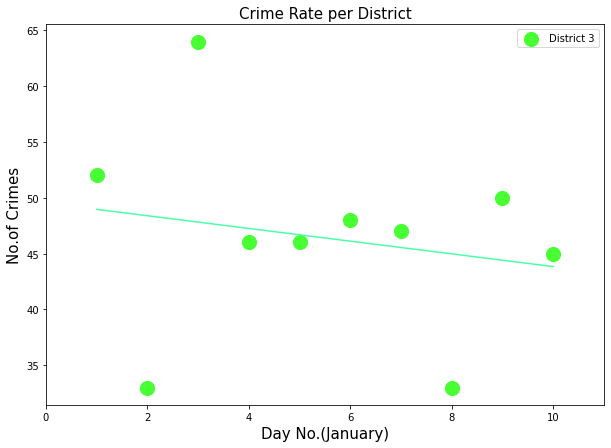

In [78]:
#14. Use a scatter plot to visualize the crime rate of District 3 for days 1-10 in the month of January 

import matplotlib.pyplot as plot
import seaborn as sns

X = data_cleaned1.iloc[:, [0,1]].values
Y = data_cleaned1['Count']
Y1 = np.array(Y)

fig, ax = plot.subplots(figsize=(10,7))

ax.set_ylabel('No.of Crimes', fontsize=15)
ax.set_xlabel('Day No.(January)', fontsize=15)
plot.title('Crime Rate per District', fontsize = 15)

District3=(data_cleaned1[(data_cleaned1.District ==3)])

plot.xlim(0,11)
plot.scatter(District3.Day, District3.Count, s = 200, c = '#48FF33', label = 'District 3')
plot.legend(loc='upper right')

z3 = np.polyfit(District3.Day, District3.Count, 1)
p3 = np.poly1d(z3)
plot.plot(District3.Day,p3(District3.Day),"#48FFAA")

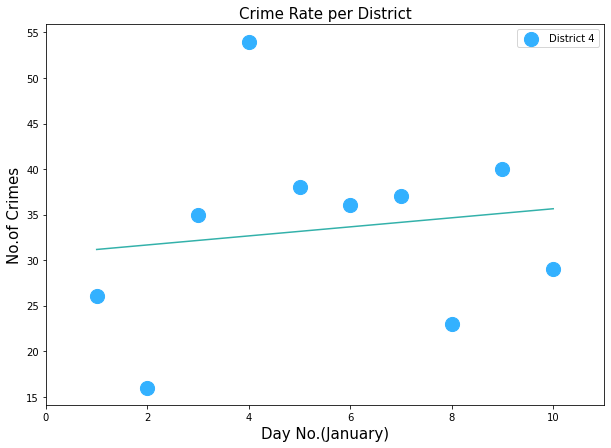

In [79]:
#15. Use a scatter plot to visualize the crime rate of District 4 for days 1-10 in the month of January 

import matplotlib.pyplot as plot
import seaborn as sns

X = data_cleaned1.iloc[:, [0,1]].values
Y = data_cleaned1['Count']
Y1 = np.array(Y)
fig, ax = plot.subplots(figsize=(10,7))

ax.set_ylabel('No.of Crimes', fontsize=15)
ax.set_xlabel('Day No.(January)', fontsize=15)
plot.title('Crime Rate per District', fontsize = 15)

District4=(data_cleaned1[(data_cleaned1.District ==4)])

plot.xlim(0,11)
plot.scatter(District4.Day, District4.Count, s = 200, c = '#33B1FF', label = 'District 4')
plot.legend(loc='upper right')

z4 = np.polyfit(District4.Day, District4.Count, 1)
p4 = np.poly1d(z4)
plot.plot(District4.Day,p4(District4.Day),"#33B1AA")

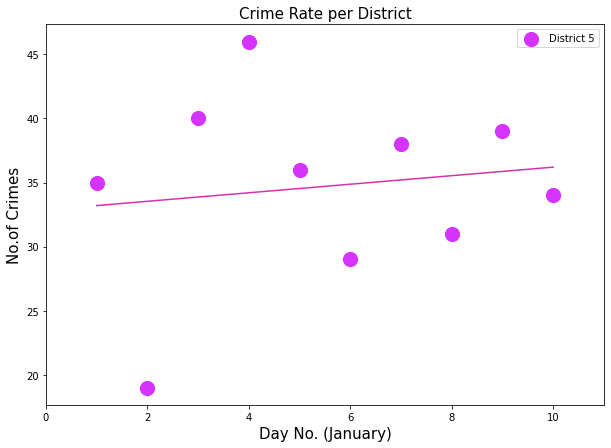

In [32]:
#16. Use a scatter plot to visualize the crime rate of District 5 for days 1-10 in the month of January 

import matplotlib.pyplot as plot
import seaborn as sns


X = data_cleaned1.iloc[:, [0,1]].values
Y = data_cleaned1['Count']
Y1 = np.array(Y)

fig, ax = plot.subplots(figsize=(10,7))

ax.set_ylabel('No.of Crimes', fontsize=15)
ax.set_xlabel('Day No. (January)', fontsize=15)

plot.title('Crime Rate per District', fontsize = 15)

District5=(data_cleaned1[(data_cleaned1.District ==5)])

plot.xlim(0,11)
plot.scatter(District5.Day, District5.Count, s = 200, c = '#D533FF', label = 'District 5')
plot.legend(loc='upper right')

z5 = np.polyfit(District5.Day, District5.Count, 1)
p5 = np.poly1d(z5)
plot.plot(District5.Day,p5(District5.Day),"#D533AA")

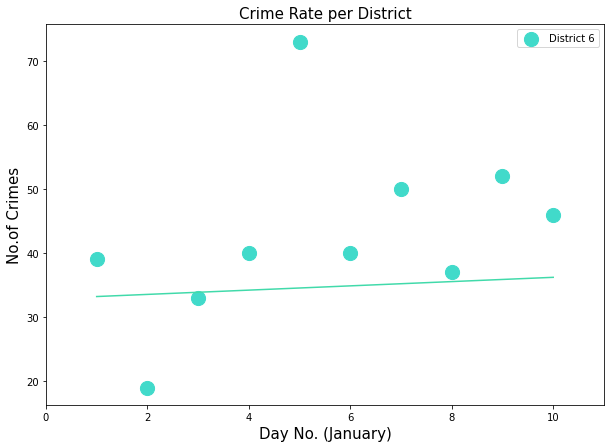

In [80]:
#17. Use a scatter plot to visualize the crime rate of District 6 for days 1-10 in the month of January 

import matplotlib.pyplot as plot
import seaborn as sns


X = data_cleaned1.iloc[:, [0,1]].values
Y = data_cleaned1['Count']
Y1 = np.array(Y)
fig, ax = plot.subplots(figsize=(10,7))

ax.set_ylabel('No.of Crimes', fontsize=15)
ax.set_xlabel('Day No. (January)', fontsize=15)
plot.title('Crime Rate per District', fontsize = 15)

District6=(data_cleaned1[(data_cleaned1.District ==6)])

plot.xlim(0,11)
plot.scatter(District6.Day, District6.Count, s = 200, c = '#41DACA', label = 'District 6')
plot.legend(loc='upper right')

z6 = np.polyfit(District6.Day, District6.Count, 1)
p6 = np.poly1d(z6)
plot.plot(District6.Day,p5(District6.Day),"#41DAAA")